In [7]:
using Plots

In [8]:
Nkx = 500 #kのx方向をNkx分割
Nky = 500 #kのy方向をNky分割
Nkz = 500 #kのz方向をNkz分割
M = 500 #エネルギーをM分割．つまりM個の階級のヒストグラムを作る．

500

In [9]:
#二次元の分散関係は三次元空間中の曲面として表される．ブリルアンゾーン内の各kの値で曲面の高さを2次元配列にする．

#分散関係
function Ek(kx,ky,kz)
    return -2*(cos(kx)+cos(ky)+cos(kz))
end

#波数をブリルアンゾーン内で分割
kxrange = range(-π,π,Nkx)
kyrange = range(-π,π,Nky)
kzrange = range(-π,π,Nkz)

-3.141592653589793:0.012591553721802777:3.141592653589793

In [10]:
#分散関係を表す二次元配列に値を入れていく．
E = zeros(Float64,Nkx,Nky,Nkz)

for i in 1:Nkx
    for j in 1:Nky 
        for k in 1:Nkz
            E[i,j,k] = Ek(kxrange[i],kyrange[j],kzrange[k])
        end
    end
end

In [11]:
function count_bins(xmin,xmax,M,A)
    count = zeros(Int64,M)
    delta = (xmax-xmin)/M

    for i in 1:size(A,1)
        for j in 1:size(A,2)
            for k in 1:size(A,3)
                e = convert(Int64,ceil((A[i,j,k]-xmin)/delta))
                count[e] += 1
            end
        end
    end

    return count
end

count_bins (generic function with 1 method)

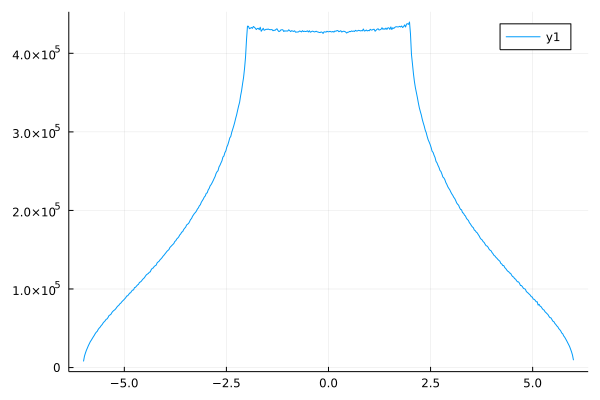

In [13]:
d = range(-6,6,M)

plot(d,count_bins(-6,6,M,E))